# Practical work 4: Frequency filtering, color

In [1]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

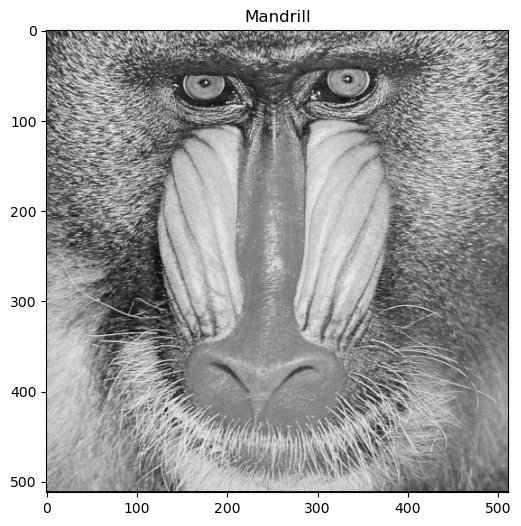

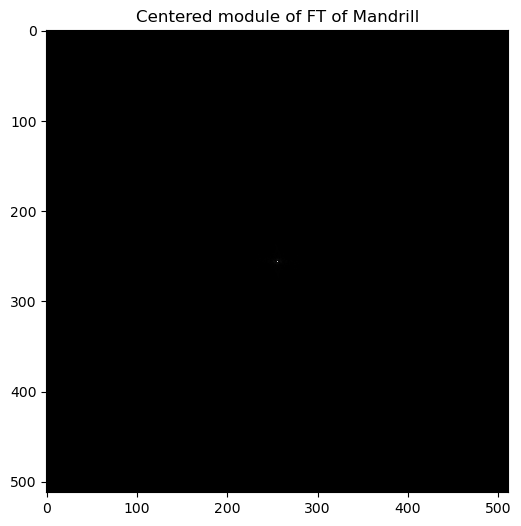

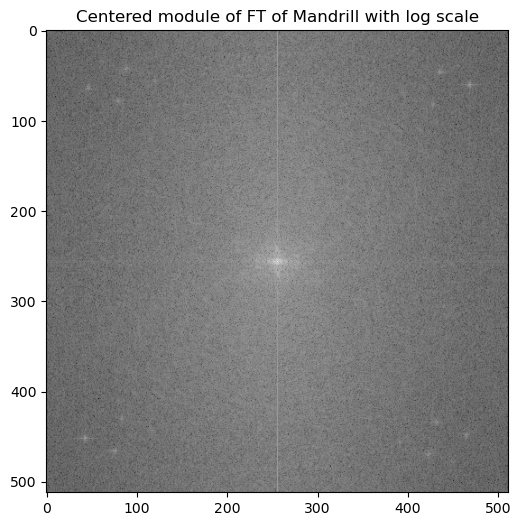

In [2]:
mandrill = np.array(Image.open('img/mandrill.png'))
imshow(mandrill, title = 'Mandrill')

#centered module of Fourier transform
ft_mandrill = fft2(mandrill)
module_mandrill = np.abs(fftshift(ft_mandrill))
log_module_mandrill = np.log10(module_mandrill+1)

imshow(module_mandrill, title='Centered module of FT of Mandrill')
imshow(log_module_mandrill, title ='Centered module of FT of Mandrill with log scale')

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

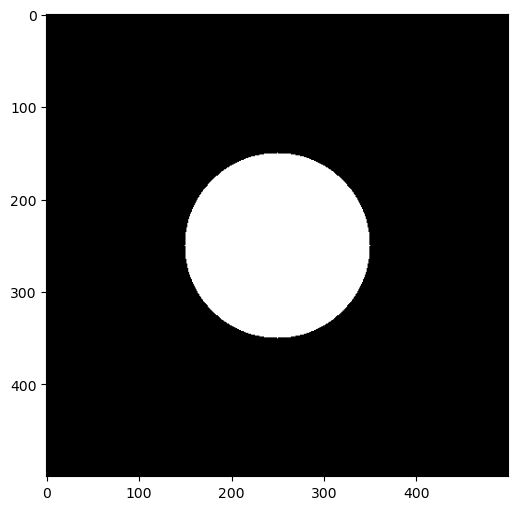

In [3]:
def idealLowPassFilter(n,m,fc):
    array = np.zeros((n*m), dtype ='int').reshape((n,m))
    for i in range(0,n):
        for j in range(0,m):
            if(np.sqrt(np.power(i-(n//2),2)+np.power(j-(m//2),2))<=fc): array[i][j] = 1
            else: array[i][j] = 0 
    return array

low_filter = idealLowPassFilter(500,500,100)
imshow(low_filter)

The filter produced in this exercise is an Ideal Low Pass Filter. 
This filter is "ideal" because it has a specified, nonzero magnitude for a specific range of frequencies and zero magnitude for frequencies outside this range. 
It is also a "low pass" filter because it puts to zero high frequencies and transmits the low frequencies.

This means that the new image that we are going to produce by applying the filter will appear smoothed, since the high-frequency in the FT means that there is an abrupt change in pixel values in the picture (could be noise or edges).

With the next exercise I am going to apply the ideal low pass filter to an image to understand first hand its effects.

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

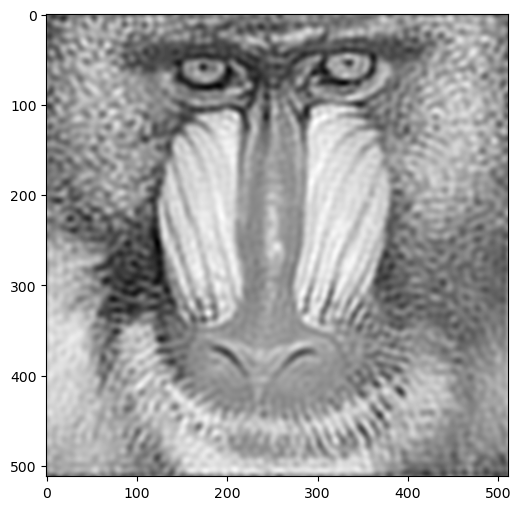

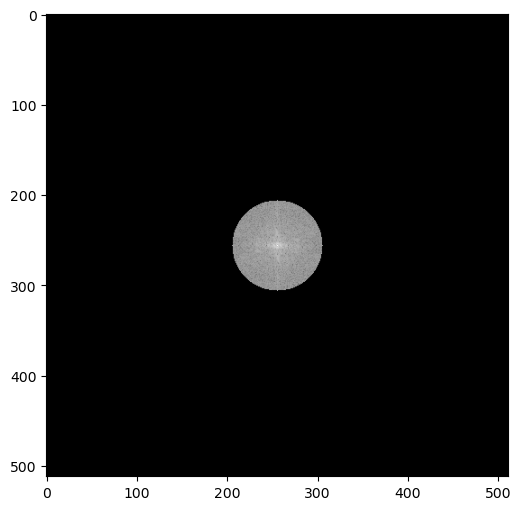

In [4]:
def lowPass(I, fc):
    array = np.array(I)
    ft_centered = fftshift(fft2(array))
    filtered_array = ft_centered*idealLowPassFilter(array.shape[0], array.shape[1], fc)
    uncentered_filtered = np.fft.ifftshift(filtered_array)
    inverse_ft = ifft2(uncentered_filtered)
    return inverse_ft.real
    
filtered_mandrill = lowPass(mandrill, 50)
imshow(filtered_mandrill)
imshow(np.log10(np.abs(fftshift(fft2(filtered_mandrill)))+1))

With this exercise we are able to see first-hand the effects of a low pass filter to an image. 

When displaying the magnitude spectrum of the Fourier transform of an image, we can observe the presence of high frequencies corresponding to regions of the picture where the pixel values increment or decrement abruptly, and low frequencies for the more smoothened parts. 

When applying a low pass filter, we keep the low frequencies and discard the higher one.
The picture produced, as it can be seen, will appear less defined, since the high frequency pixels correspond to noise but also to the edges of the picture. 

In the next exercise I am going to observe the effects of a low pass filter on the images with different cut off frequencies. 
What I expect to see is that by decreasing the Fc, the image will appear more smoothened and less defined.

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.



ANALYSIS ON MANDRILL-------------------------------------------------------------------------




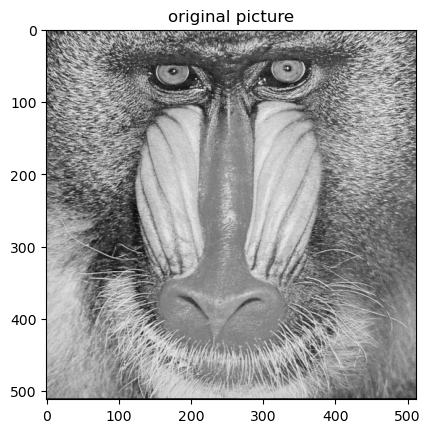

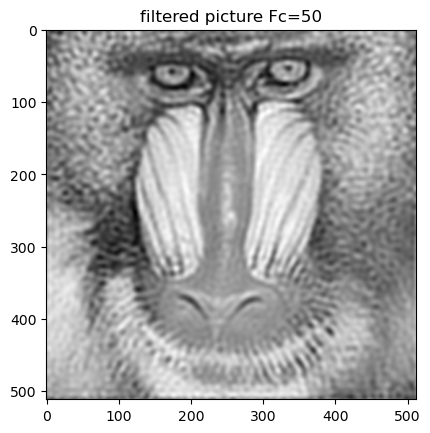

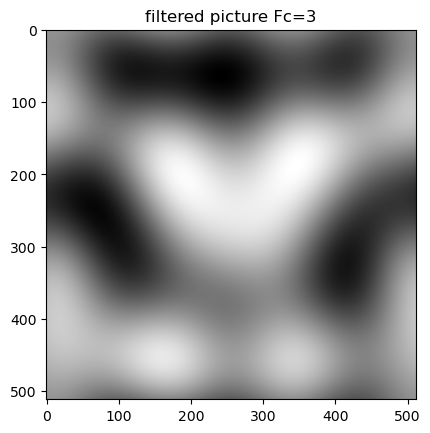

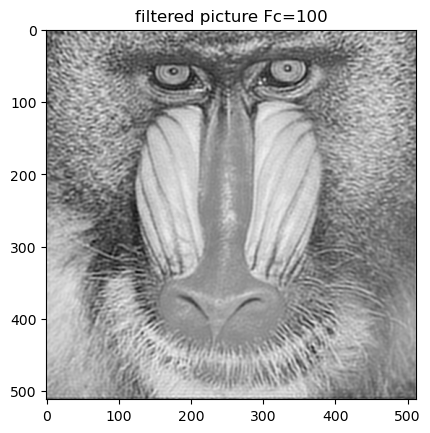


ANALYSIS ON LENA-----------------------------------------------------------------------------------




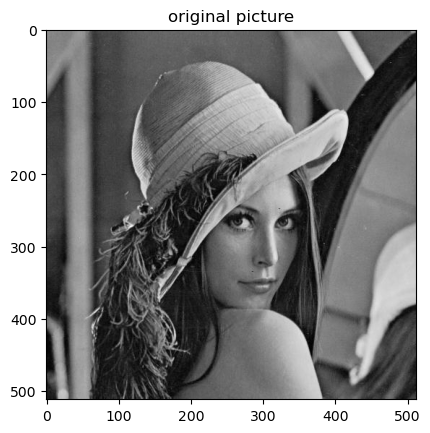

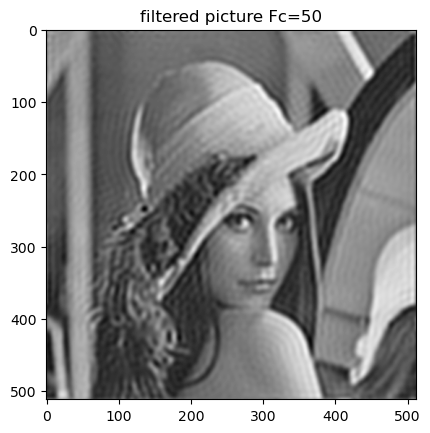

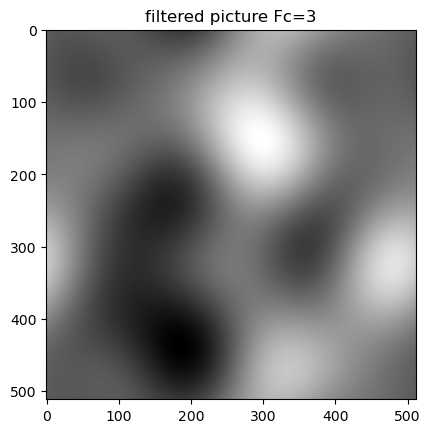

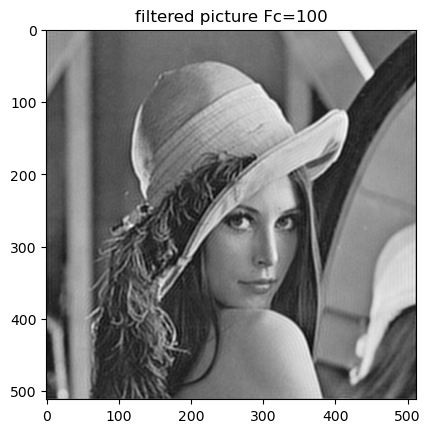

In [5]:
mandrill = np.array(Image.open('img/mandrill.png'))
lena = np.array(Image.open('img/lena.jpg'))

print('\nANALYSIS ON MANDRILL-------------------------------------------------------------------------\n\n')
plt.imshow(mandrill)
plt.title('original picture')
plt.show()

filtered_mandrill = lowPass(mandrill, 50)
plt.imshow(filtered_mandrill)
plt.title('filtered picture Fc=50')
plt.show()

filtered_mandrill = lowPass(mandrill, 3)
plt.imshow(filtered_mandrill)
plt.title('filtered picture Fc=3')
plt.show()

filtered_mandrill = lowPass(mandrill, 100)
plt.imshow(filtered_mandrill)
plt.title('filtered picture Fc=100')
plt.show()

print('\nANALYSIS ON LENA-----------------------------------------------------------------------------------\n\n')
plt.imshow(lena)
plt.title('original picture')
plt.show()

filtered_lena = lowPass(lena, 50)
plt.imshow(filtered_lena)
plt.title('filtered picture Fc=50')
plt.show()

filtered_lena = lowPass(lena, 3)
plt.imshow(filtered_lena)
plt.title('filtered picture Fc=3')
plt.show()

filtered_lena = lowPass(lena, 100)
plt.imshow(filtered_lena)
plt.title('filtered picture Fc=100')
plt.show()

As can be seen from this exercise, the low-pass filter retains the lowest frequencies in the image and sets those above the cutoff frequency Fc to zero. 
As we expected, as the value of the cutoff frequency increases, there is a sharp filtered image, from which only random noise is removed, while gradually lowering it risks losing the structure of the image itself. 

## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

The number of rows and columns that need to be added to each side of the image depends on the size of the kernel you want to apply to it.
In particular, given as an assumption that the kernel is always of odd size, one must consider the extreme situations, that is when the kernel is centered on one of the four corners of the image. One must then have a "frame" of (n-1)/2 rows and columns around the image in order for the filter to operate properly.

This way in total the final size of the image, after the padding, will have (n-1) rows and (n-1) columns added to it.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 145 ... 177   0   0]
 ...
 [  0   0  10 ...   4   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


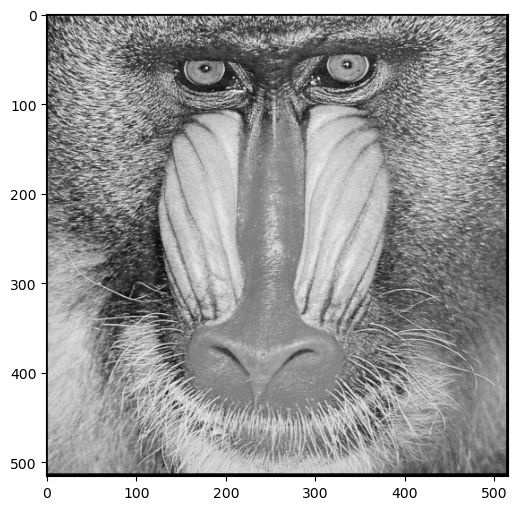

original picture shape:  (512, 512)
padded image shape:  (516, 516)


In [6]:
def imagePad(I,h):
    array = np.array(I)
    added = (h-1)//2

    padded_array = np.zeros((2*added+I.shape[0])*(2*added+I.shape[1]), dtype ='int').reshape((2*added+I.shape[0]),(2*added+I.shape[1]))

    for i in range(added, I.shape[0]+added):
        for j in range(added, I.shape[1]+added):
            padded_array[i][j] = array[i-added][j-added]
    
    return padded_array
            
pad = imagePad(mandrill, 5)
print(pad)
imshow(pad)
print("original picture shape: ", mandrill.shape)
print("padded image shape: ", pad.shape)

There are various ways of padding a picture before applying a kernel to it for the filtering operation. 
The one used here is referred to as the "zero-padding technique", where the picture is "framed" by pixels with value 0.

In accordance with the formula I presented in the previous exercise, we can see how the size of the padded image has 4 rows and 4 columns more than the original picture (kernel dimension: 5 -> (n-1) = 4)

Another used padding technique is the circular convolution, where the image is repeated in two directions. This is particularly used and useful when working with images that present a periodic pattern.

3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [7]:
def product(subImage, kernel):
    new_pixel = 0
    
    for i in range(subImage.shape[0]):
        for j in range(subImage.shape[1]):
            new_pixel += subImage[i][j]*kernel[i][j]
            
    return new_pixel

In [8]:
def conv2(I,h):
    padded_image = imagePad(I,h)
    filtered_image = np.zeros(I.shape[0]*I.shape[1], dtype='int').reshape(I.shape[0], I.shape[1])

    added = (h-1)//2
    
    kernel = np.ones(h*h, dtype='int').reshape(h,h)

    for i in range(added, filtered_image.shape[0]-added):
        for j in range(added, filtered_image.shape[1]-added): 
                    subImage = padded_image[i-added:i+added+1:,j-added:j+added+1:]
                    filtered_image[i-added][j-added] = product(subImage, kernel)
            
    return filtered_image 

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

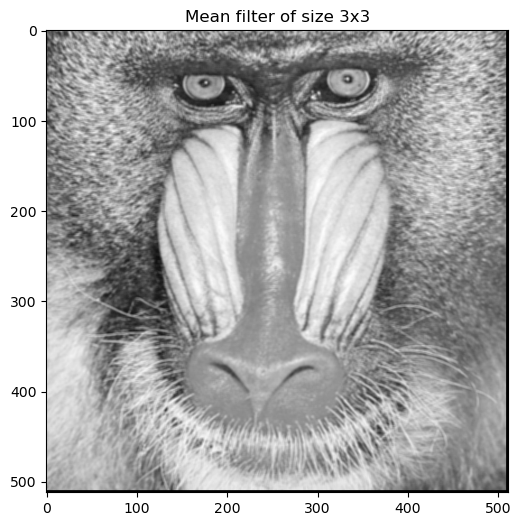

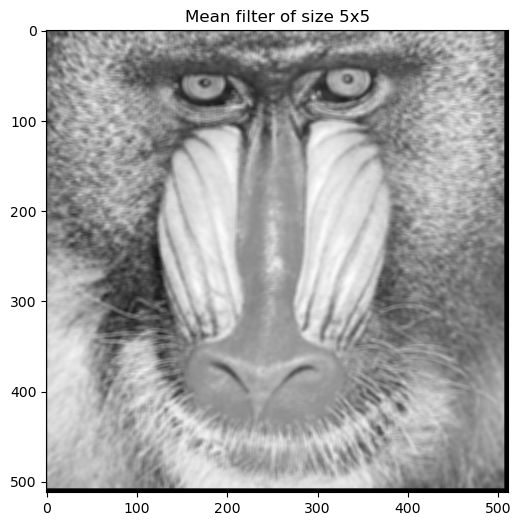

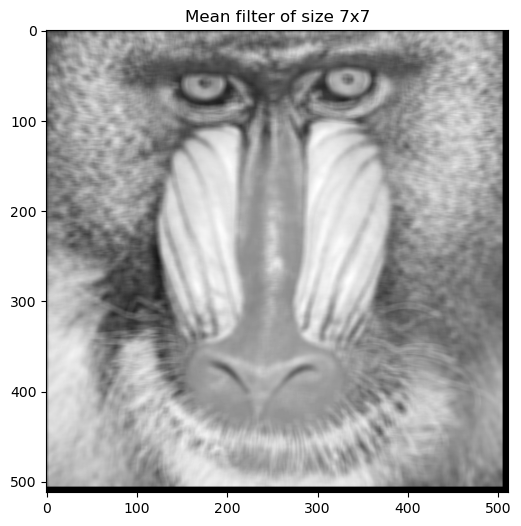

In [9]:
imshow(conv2(mandrill, 3), title="Mean filter of size 3x3")
imshow(conv2(mandrill, 5), title="Mean filter of size 5x5")
imshow(conv2(mandrill, 7), title="Mean filter of size 7x7")

By definition, the mean filter returns a new value for each pixel in the image, weighted by the contribution made by the pixels that surround it. 

This works well with small kernels, as it allows small noise to be removed from the image while keeping it intact (as with the 3x3 kernel), while increasing the size of the kernel adds up to too many different contributions for each pixel and tends to flatten the image a lot.

The main reason for this is that in this case equal weight is assigned to each pixel around the pixel under consideration - one can partly solve this problem by using other filters, such as the Gaussian filter, which assign a gradually smaller coefficient to pixels according to their proximity to the central one.

5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

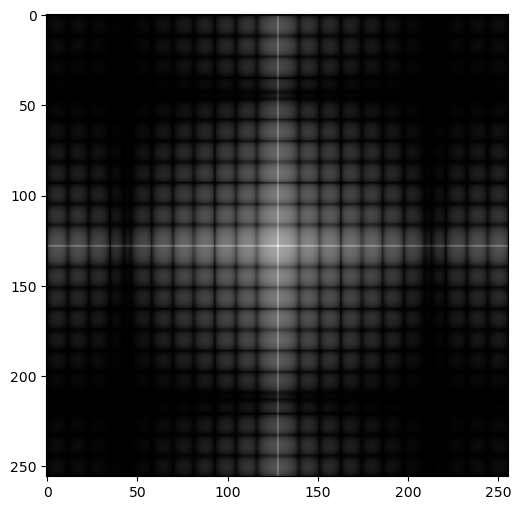

In [10]:
base_image = np.ones((234,234))
padded_image = imagePad(base_image, 23)
mean_filter_image = conv2(padded_image, 3)
log = np.log10(np.abs(fftshift(fft2(mean_filter_image)))+1)
imshow(log)

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

The mean filter in the time domain is obtained by the convolution of the Image with the chosen kernel. 
To analyse it in the frequency domain, we have to calculate the Fourier Transform of the operation. 
One of the most important properties of the Fourier Transform is that the FT of the convolution of two variables is equal to the product of the FT of each variable.

time domain: y(n, m) = x ⋆ h(n, m)
frequency domain: Y(f,g) = X(f , g) × H(f , g)

This means that frequencies are generally amplified and made more similar to each other (concept of smoothing the picture).

The mean filter is not an ideal low pass filter as it doesn't have boundaries, there is no cutting frequency above or under of which the images's frequencies are cut.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

(3, 3)


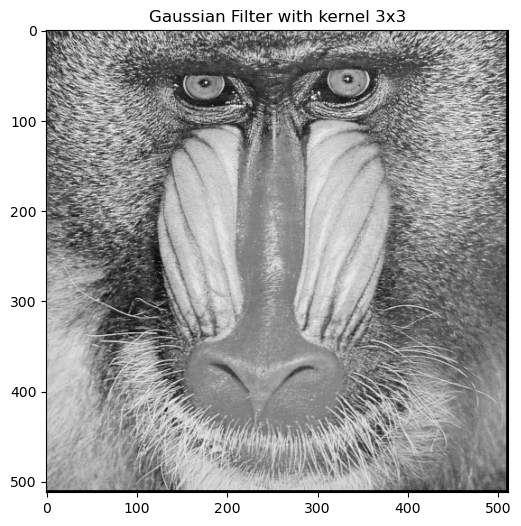

(5, 5)


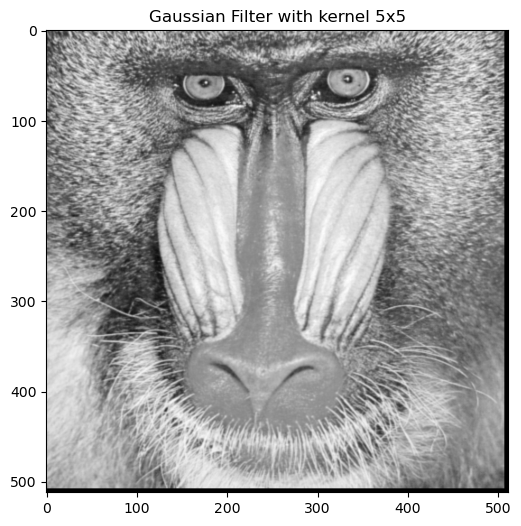

(3, 3)


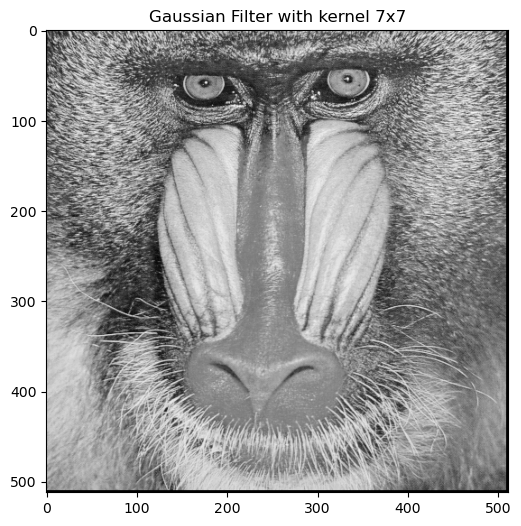

(15, 15)


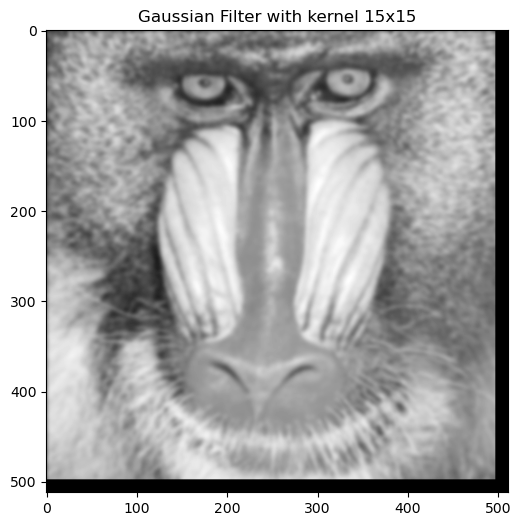

In [11]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

def gaussianConv(I, sigma):
    kernel = gaussianKernel(sigma)
    image = np.array(I)
    padded_image = imagePad(image, kernel.shape[0])
    
    filtered_image = np.zeros(I.shape[0]*I.shape[1], dtype='int').reshape(I.shape[0], I.shape[1])
    #print(filtered_image.shape)
    
    added = (kernel.shape[0]-1)//2
    
    print(kernel.shape)
    #print(kernel)
    
    for i in range(added, filtered_image.shape[0]-added):
        for j in range(added, filtered_image.shape[1]-added): 
                    subImage = padded_image[i-added:i+added+1:,j-added:j+added+1:]
                    filtered_image[i-added][j-added] = product(subImage, kernel)
            
    return filtered_image

#explanation of choice of sigma below
#filter 3x3: sigma = (3-1)/6 = 0.3333 
imshow(gaussianConv(mandrill, ((3-1)/6)), title = "Gaussian Filter with kernel 3x3")

#filter 5x5: sigma = (5-1)/6 = 0.6667
imshow(gaussianConv(mandrill, ((5-1)/6)), title = "Gaussian Filter with kernel 5x5")

#filter 7x7: sigma = (7-1)/6 = 1
imshow(gaussianConv(mandrill, ((3-1)/6)), title = "Gaussian Filter with kernel 7x7")

#filter 15x15: sigma = (15-1)/6 = 2.3333
imshow(gaussianConv(mandrill, ((15-1)/6)), title = "Gaussian Filter with kernel 15x15")


To relate kernel size to sigma of the Gaussian Kernel, I considered that sigma affects the calculation of coefficients within the Gaussian kernel. 
If k is the size of kernel than sigma=(k-1)/6 . This is because the length for 99 percentile of Gaussian is 6*sigma - below this value the coefficients have such low value that they are all approximated to zero.

We can see a big difference in the output of using the Gaussian filter: even by increasing the size of the kernel, the image does not lose sense and its contours remain defined, while random noise can be reduced. This is because the multiplicative coefficient of each pixel around the central one is different according to the distance of those pixels from the central pixel itself. 

I have added a very large kernel case (size 15x15) to show how by exaggerating in the size of the kernel even here the filtered image would lose the contrast given by the edges.

## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

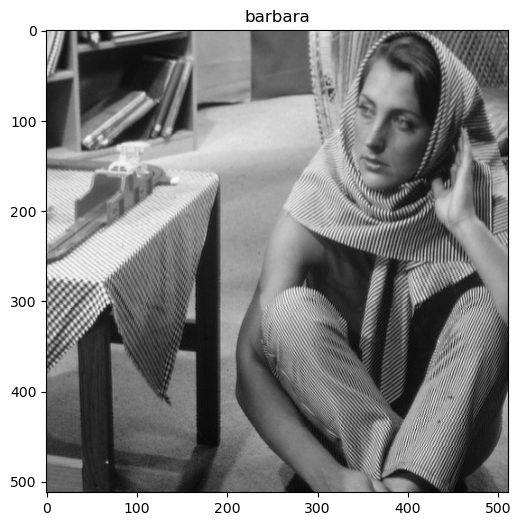

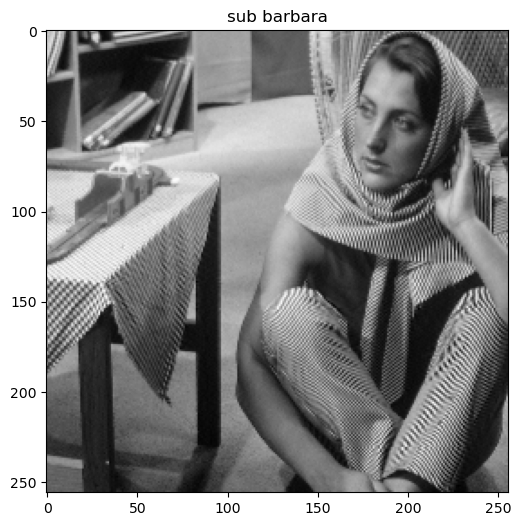

In [12]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))
imshow(barbara, title='barbara')

sub_barbara = subSample2(barbara)
imshow(sub_barbara, title='sub barbara')

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

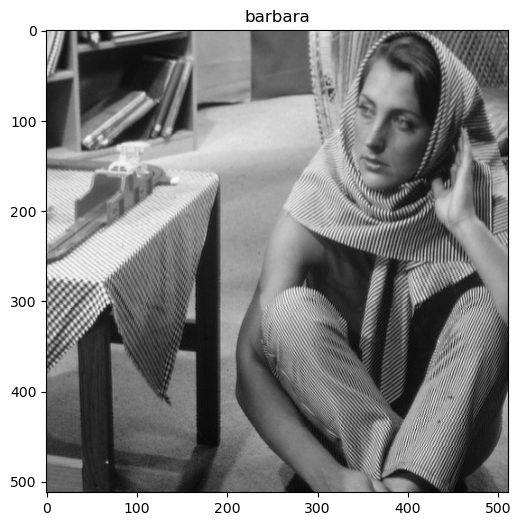

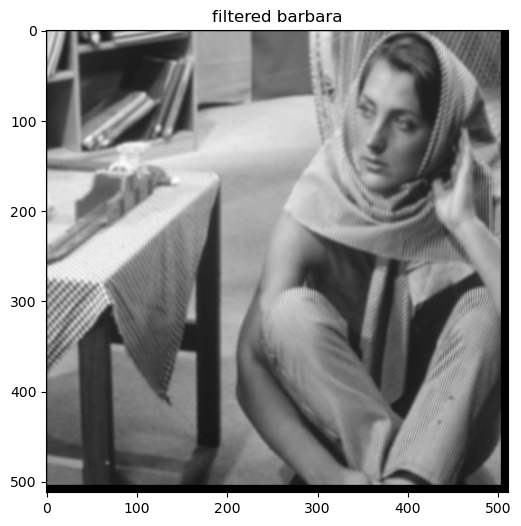

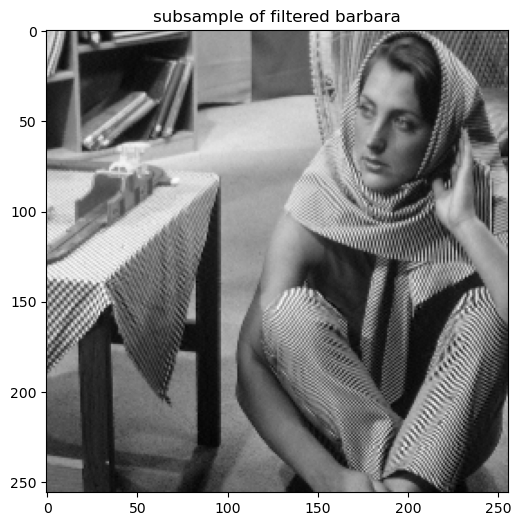

In [13]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A
### your answer start below

def antiAliasing(I):
    image = np.array(I)
    padded_image = imagePad(image, 9)
    
    #let's apply the low pass filter
    anti_alias = antiAliasingFilter(9,9)
    
    filtered_image = np.zeros(I.shape[0]*I.shape[1], dtype='int').reshape(I.shape[0], I.shape[1])
    #print(filtered_image.shape)
    
    added = (anti_alias.shape[0]-1)//2
    
    #print(kernel.shape)
    #print(kernel)
    
    for i in range(added, filtered_image.shape[0]-added):
        for j in range(added, filtered_image.shape[1]-added): 
                    subImage = padded_image[i-added:i+added+1:,j-added:j+added+1:]
                    filtered_image[i-added][j-added] = product(subImage, anti_alias)
    return filtered_image

def antiAlias_and_Sub2(I):
    filterImage = antiAliasing(I)
    final_image = subSample2(filterImage)
    
    return final_image
    
barbara = np.array(Image.open('img/barbara.png'))
imshow(barbara, title='barbara')

filteredBarbara = antiAliasing(barbara)
imshow(filteredBarbara, title ='filtered barbara')

final_barbara = antiAlias_and_Sub2(barbara)
imshow(sub_barbara, title='subsample of filtered barbara')

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

In this exercise we can compare the results obtained by simply filtering the Barbara image and taking a subsample of the filtered image.

Filtering produces a smoother image, which tends to lose the high frequencies and thus also the contours of the image (as can be seen from the "filtered Barbara" image).

Going to make a subsample of the filtered image we take only a portion of the original pixels (specifically a subsample with step 2, that is taking only the even indices). 
This normally causes the image to lose quality, since some of the information is lost, but in the case of the filtered image we see that the loss of information given by subsampling is balanced by the smoothing obtained by filtering.

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

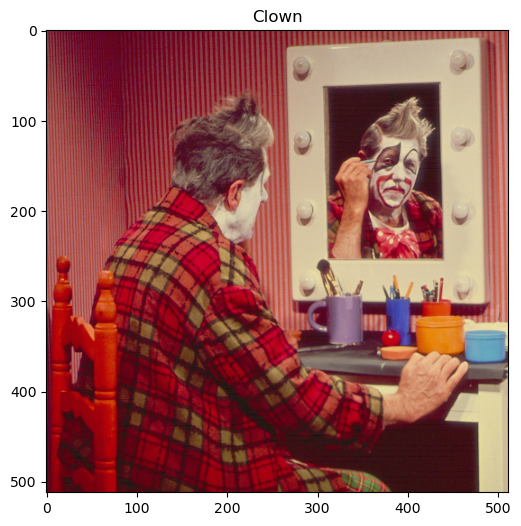

Clown shape:  (512, 512, 3)


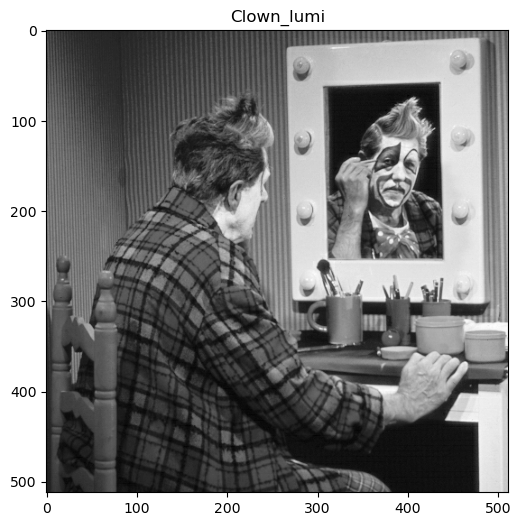

Clown_lumi shape:  (512, 512)


In [14]:
clown = np.array(Image.open('img/clown.bmp'))
imshow(clown, title = 'Clown')
print("Clown shape: ", clown.shape)

clown_lumi = np.array(Image.open('img/clown_lumi.bmp'))
imshow(clown_lumi, title = 'Clown_lumi')
print("Clown_lumi shape: ", clown_lumi.shape)

2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

(512, 512, 3)
(512, 512)


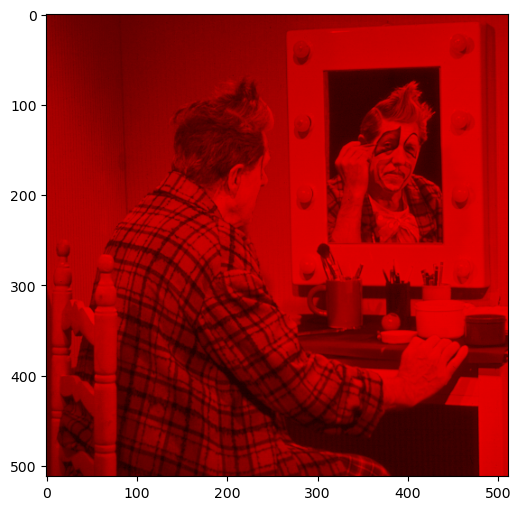

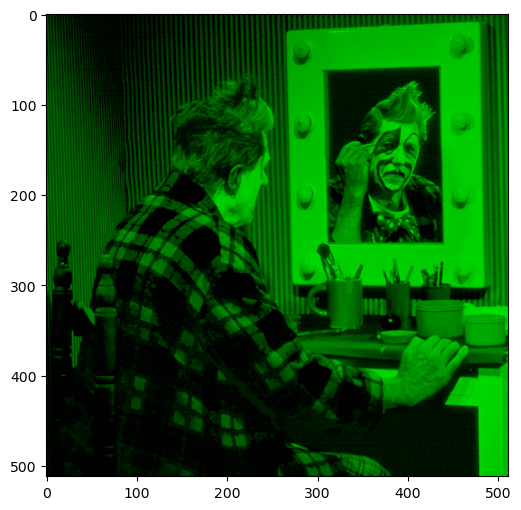

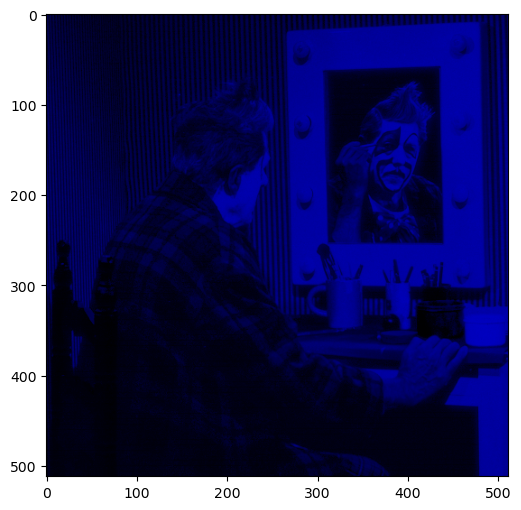

In [15]:
print(clown.shape)
print(clown_lumi.shape)
#3 dim = 3 channels of color
#3 channels subarrays of clown 

I_red = clown.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0 
imshow(I_red)

I_green = clown.copy()  # Duplicate image
I_green[:, :, 0] = 0    # Zero out contribution from green
I_green[:, :, 2] = 0 
imshow(I_green)

I_blue = clown.copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from green
I_blue[:, :, 1] = 0 
imshow(I_blue)

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

Text(0.5, 1.0, 'Clown with inverted green and blue values')

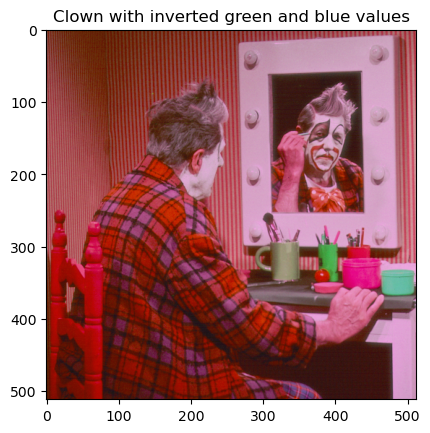

In [16]:
I_red = clown.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0

new_image = np.zeros((512,512,3), dtype='int')
#red in first position
new_image += I_red


I_blue = clown.copy()  # Duplicate image
I_blue[:, :, 0] = 0    # Zero out contribution from green
I_blue[:, :, 1] = 0 
new_I_blue = np.zeros((512,512,3), dtype='int')
new_I_blue[:,:,[1,2]] = I_blue[:,:,[2,1]]
new_image += new_I_blue

#print(new_image)

new_I_green = np.zeros((512,512,3), dtype='int')
new_I_green[:,:,[2,1]] = I_green[:,:,[1,2]]
#print(new_I_green)

new_image += new_I_green

plt.imshow(new_image, vmin=0, vmax=1)
plt.title("Clown with inverted green and blue values")

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

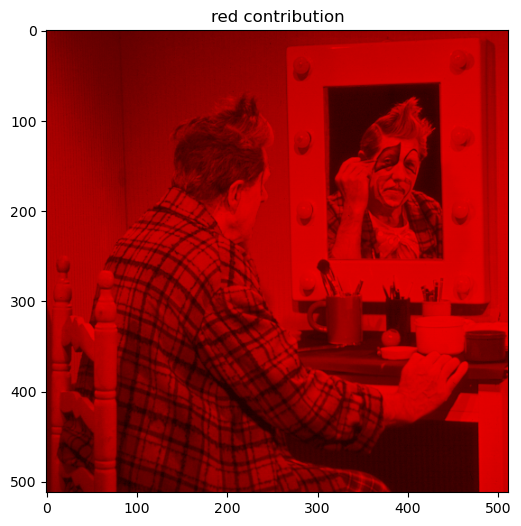

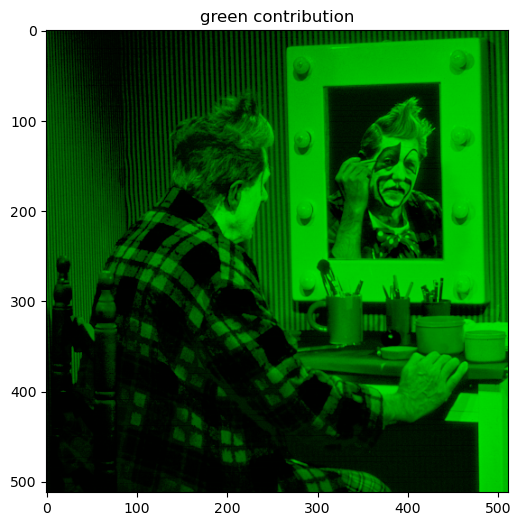

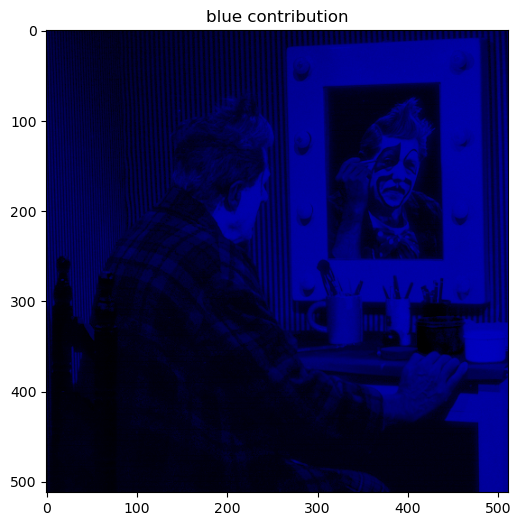

In [17]:
def seeRGB(I):
    I_red = I.copy()  # Duplicate image zero out contribution from green and blue
    I_red[:, :, 1] = 0    
    I_red[:, :, 2] = 0 


    I_green = I.copy()  # Duplicate image zero out contribution from red and blue
    I_green[:, :, 0] = 0    
    I_green[:, :, 2] = 0 


    I_blue = I.copy()  # Duplicate image and zero out contribution from red and green
    I_blue[:, :, 0] = 0    
    I_blue[:, :, 1] = 0 
    
    return I_red, I_green, I_blue

I_red, I_green, I_blue = seeRGB(clown)
imshow(I_red, title ='red contribution')
imshow(I_green, title ='green contribution')
imshow(I_blue, title ='blue contribution')